In [108]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.svm import SVR

In [138]:
d = {'likes_popcorn':[1,1,0,1,0,0], 'age':[12,87,44,19,32,14], 'favorite_color':[1,0,1,2,0,1], 'loves_troll':[1,1,0,0,1,1], 'residuals':[0,0,0,0,0,0]}

In [139]:
data = pd.DataFrame(data=d)
data

,likes_popcorn,age,favorite_color,loves_troll,residuals
0,1,12,1,1,0
1,1,87,0,1,0
2,0,44,1,0,0
3,1,19,2,0,0
4,0,32,0,1,0
5,0,14,1,1,0


In [140]:
data["age"] = np.abs(data["age"] - data["age"].mean())/data["age"].std()
#data["favorite_color"] = (data["favorite_color"] - data["favorite_color"].mean())/data["favorite_color"].std()
data

,likes_popcorn,age,favorite_color,loves_troll,residuals
0,1,0.799458,1,1,0
1,1,1.845807,0,1,0
2,0,0.329189,1,0,0
3,1,0.552567,2,0,0
4,0,0.094054,0,1,0
5,0,0.728918,1,1,0


In [141]:
def softmax(x):
    return 1.0 / (1.0 + np.exp(-1*x))

In [65]:
def crossentropy(y_pred, y):
    return y*np.log(y_pred)

Since, four people in the Training Data set Love Troll 2 and 2 people do not. Then the probabilty that someone Loves Troll 2 is softmax(4.0/2.0)

In [142]:
a = softmax(4.0/2.0) 
a

0.8807970779778823

In [143]:
h = np.array([a]*6)

The residuals are the difference between the predicted value and the label, because we are using softmax or sigmoid to calculate the probabilty and using cross entropy loss the derivative of loss with respect to F will be Y - $\hat{y}$.
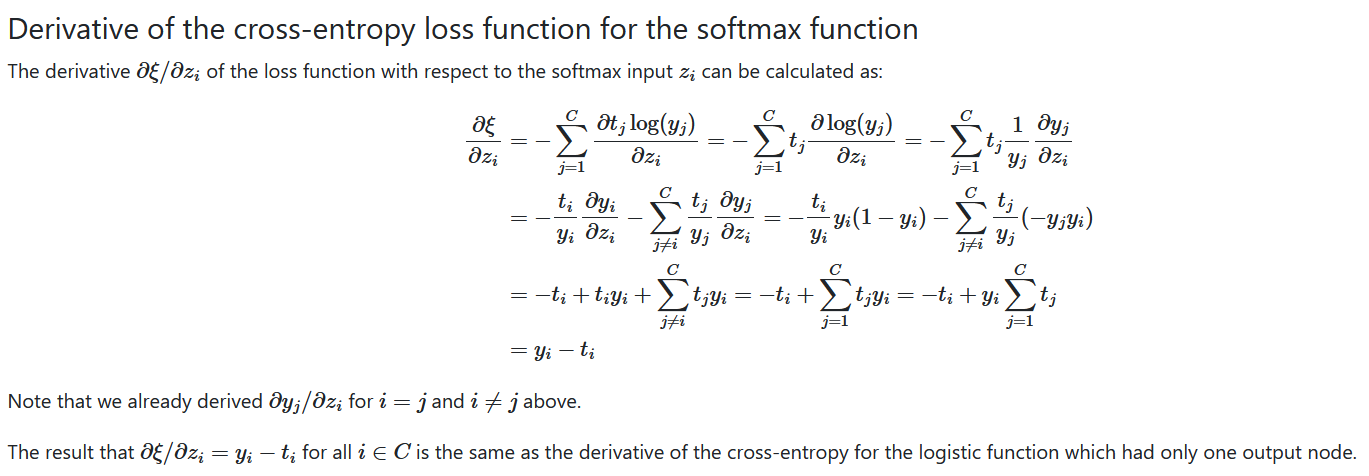

In [144]:
data["residuals"] = data["loves_troll"] - a
data

,likes_popcorn,age,favorite_color,loves_troll,residuals
0,1,0.799458,1,1,0.119203
1,1,1.845807,0,1,0.119203
2,0,0.329189,1,0,-0.880797
3,1,0.552567,2,0,-0.880797
4,0,0.094054,0,1,0.119203
5,0,0.728918,1,1,0.119203


In [145]:
data_train = data.to_numpy()
y = data_train[:, 3:4]
y_train = data_train[:, 4:] #the residuals
data_train = data_train[:, :3]
y_train = y_train.reshape(1, 6)

In the next step we train our data based on the residuals that we have:

In [146]:
# linear kernel
clf = SVR()
clf.fit(data_train, y_train[0])

SVR()

In [89]:
#clf.coef_

In the next part we predict the inputs

In [147]:
predict = clf.predict(data_train)
predict

array([ 0.01940469,  0.01885727, -0.2458493 , -0.78093464,  0.01962192,
        0.01906539])

then we we use softmax to calculate probability:

In [148]:
p = softmax(predict)
p

array([0.50485102, 0.50471418, 0.43884539, 0.31411848, 0.50490532,
       0.5047662 ])

alpha is actually the learning rate, the learning rate is calculated according to the previous part of the question

In [154]:
gamma = np.sum(y - h)/ np.sum(h*(1 - h)*predict)
gamma

77.29832193655832

In [155]:
h_m = predict/(a*(1-a))
h_m

array([ 0.18481789,  0.17960403, -2.34156497, -7.43792715,  0.18688682,
        0.18158621])

In [156]:
new_y = a + gamma*h_m # adding the first ansatz and learning rate*p
new_y

array([  15.16690947,   14.76388699, -180.11824594, -574.05849003,
         15.32683462,   14.9171061 ])

In [157]:
softmax(new_y)

array([9.99999741e-001, 9.99999613e-001, 5.96540176e-079, 4.89289042e-250,
       9.99999779e-001, 9.99999668e-001])

In [158]:
data["residuals"] = data["loves_troll"] - softmax(new_y)
data

,likes_popcorn,age,favorite_color,loves_troll,residuals
0,1,0.799458,1,1,2.588778e-07
1,1,1.845807,0,1,3.873693e-07
2,0,0.329189,1,0,-5.965402e-79
3,1,0.552567,2,0,-4.892890e-250
4,0,0.094054,0,1,2.206176e-07
5,0,0.728918,1,1,3.323403e-07


End of part 1

as we can see the difference between our prediction is and the reality is not so high. if we set the threshhold to 0.5 we see that:

In [162]:
final_preds = np.zeros((1, 6))
for i in range(0, 6):
    if softmax(new_y)[i] > 0.5:
        final_preds[0][i] = 1
    else:
        final_preds[0][i] = 0
final_preds

array([[1., 1., 0., 0., 1., 1.]])

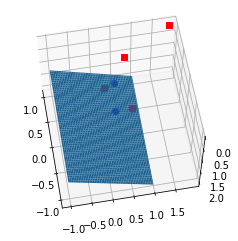

In [163]:
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]
z_ = lambda x,y: (0.7)

tmp = np.linspace(-1,1,100)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z(x,y))

# zs = np.array(fun(np.ravel(x), np.ravel(y)))
# Z = zs.reshape(x.shape)

# ax.plot_surface(x, y, Z)
ax.plot3D(data[data['loves_troll']==0]['likes_popcorn'], data[data['loves_troll']==0]['age'], data[data['loves_troll']==0]["favorite_color"],'ob')
ax.plot3D(data[data['loves_troll']==1]['likes_popcorn'], data[data['loves_troll']==1]['age'], data[data['loves_troll']==1]["favorite_color"],'sr')
ax.view_init(-120, 10)
plt.show()